## groupby()


#### groupby()와 함께 사용하는 집계 메소드

추출하고자 하는 정보를 group by() 와 아래 함수를 함께 사용할 수 있다.

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75)
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [3]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx')
df

,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1
...,...,...,...,...,...,...,...,...
346,고속,호남선,청주,광주,207.5,268,4858,40.3
347,고속,호남선,청주시외,여수,290.1,21,513,54.3
348,우등,호남선,광주,전주,105.9,1802,34137,67.7
349,고속,호남선,광주,전주,105.9,1043,30394,64.8


In [8]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수

df_group = df.groupby('선별') # data. groupby 라는 다른 type를 출력
df_group.count() # = df.groupby('선별').count()

,차종,출발지,도착지,거리,총운행횟수,총이용인원,이용율
선별,,,,,,,
88선,18,18,18,18,18,18,18
경부선,105,105,105,105,105,105,105
경인선,25,25,25,25,25,25,25
구마선,30,30,30,30,30,30,30
남해선,21,21,21,21,21,21,21
동해선,4,4,4,4,4,4,4
영동선,26,26,26,26,26,26,26
호남선,122,122,122,122,122,122,122


In [ ]:
df_group['차종'].count()


In [32]:
%matplotlib inline 
# 리눅스에서 한글로 처리되지않을까봐 한글로 처리해주는 작업
# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

In [33]:
#값들을 정렬해서 출력하고 싶어요.
#df_group['차종'].count().sort_values()를 길쭉하게 풀어보자

dfgourp2 = df_group['차종'].count()
dfgourp2.sort_values()

선별
동해선      4
88선     18
남해선     21
경인선     25
영동선     26
구마선     30
경부선    105
호남선    122
Name: 차종, dtype: int64

<Axes: xlabel='선별'>

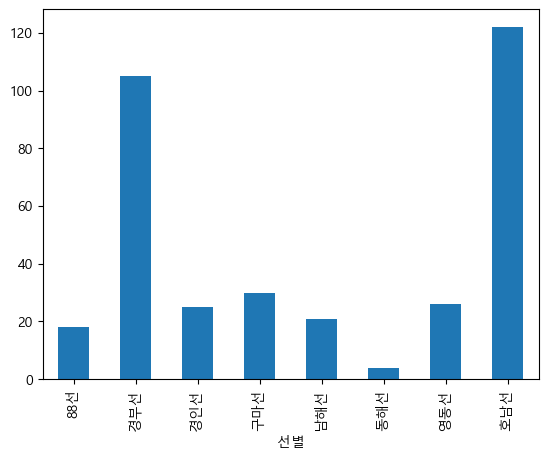

In [34]:
# 노선별 수에 대한 그래프
df_group['선별'].count().plot(kind='bar')

<Axes: xlabel='선별'>

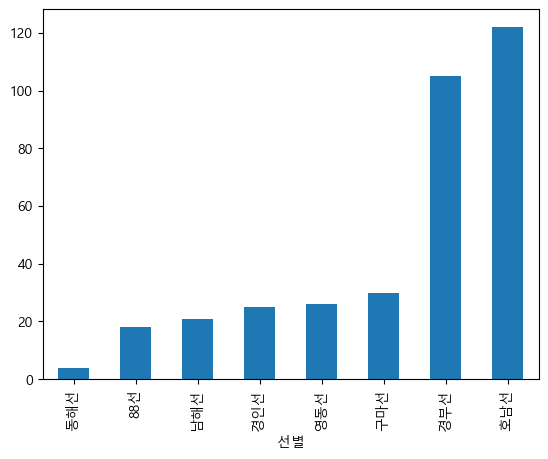

In [43]:
# 위의 그래프를 그리는데 정렬하려면?
df_group['선별'].count().sort_values().plot(kind='bar')

<Axes: xlabel='차종,선별'>

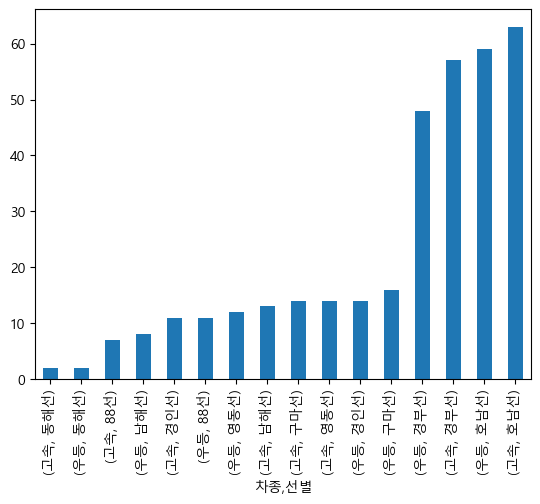

In [42]:
# 차종별, 노선별별 그룹화 작업
df[['차종','선별']]

# 차종으로 묶고나서 개수 세기
# df.groupby('차종').count()

df.groupby(['차종','선별']).count()

temp = df.groupby(['차종','선별'])
temp2 = temp['총이용인원'].count()
temp2.sort_values().plot(kind='bar')

In [45]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사
#Pivot 대신 crosstab 을 이용

data = pd.crosstab(df['차종'],df['선별']) # 1번 행을 차종 1번 열을 선별로 컬럼을 정해서 data를 만드는
data


선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선
차종,,,,,,,,
고속,7,57,11,14,13,2,14,63
우등,11,48,14,16,8,2,12,59


<Axes: xlabel='차종'>

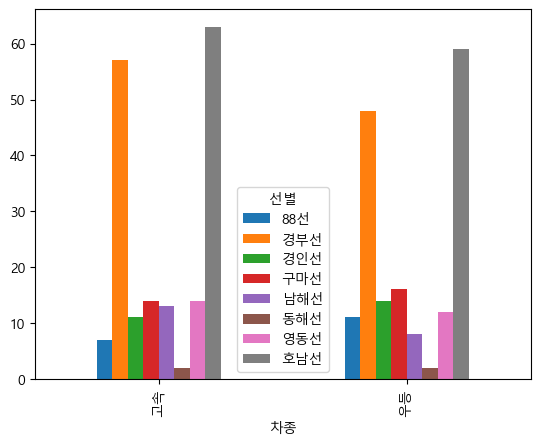

In [47]:
data.plot(kind='bar')